# Predicting and understanding viewer engagement with educational videos 

##### *This project is an assignment that was submitted as a final deliverable and underwent peer review as part of my previous data science education program.* 

As the popularity of online education continues to grow, Open-access educational platforms like Massive Open Online Courses (MOOCs) on sites such as Coursera have made a vast array of lectures and tutorials accessible to millions globally, myself included and the specialization programs have led me to great learning opportunities. 
However, I figured that this abundance of content also presents a challenge in effectively finding, filtering, and aligning these resources with learner needs so I believe that this project shows how machine learning can be applied to tackle aspects of this challenge.

## About the prediction problem

Engagement is a key attribute of educational videos: how engaging it is to keep viewers interested enough to continue watching. Typically, engagement can be assessed by observing how much of a video a viewer completes. A video that fails to capture interest often sees viewers dropping off early, sometimes after viewing as little as 5 or 10% of the total content.
To enhance the relevance and impact of educational materials, it's essential to identify the characteristics that make videos engaging. In this project, I will be predicting the potential engagement level of educational videos. This prediction will be based on various features derived from the video's transcript, audio, hosting platform, and other relevant sources.

**This prediction problem was chosen for several reasons:**

* It uses different features pulled from a wide range of resources connected to the original data;
* Predicting how popular or engaging a media item will be, is not only fun but also a practical way to use machine learning in business and education.
* *Drawing from my background in marketing, I'm particularly interested in the dynamics of viewer engagement and I wanted to explore this area from a quantitative aspect after working in its creative aspect.*


## About the dataset

The training and test datasets of educational video features were extracted from the VLE Dataset put together by researcher Sahan Bulathwela at University College London. 

**Data fields**

train.csv & test.csv:

    title_word_count - the number of words in the title of the video.
 
    document_entropy - a score indicating how varied the topics are covered in the video, based on the transcript. Videos with smaller entropy scores will tend to be more cohesive and more focused on a single topic.
    
    freshness - The number of days elapsed between 01/01/1970 and the lecture published date. Videos that are more recent will have higher freshness values.
    
    easiness - A text difficulty measure applied to the transcript. A lower score indicates more complex language used by the presenter.
    
    fraction_stopword_presence - A stopword is a very common word like 'the' or 'and'. This feature computes the fraction of all words that are stopwords in the video lecture transcript.
    
    speaker_speed - The average speaking rate in words per minute of the presenter in the video.
    
    silent_period_rate - The fraction of time in the lecture video that is silence (no speaking).
    
train.csv only:
    
    engagement - Target label for training. True if learners watched a substantial portion of the video, or False otherwise.

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

##### *Note* : Data has already been pre-processed 

In [7]:
def engagement_model():
    rec = None
    
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.metrics import r2_score, mean_absolute_error, roc_auc_score
    
    traindf = pd.read_csv('assets/train.csv',index_col='id')
    testdf = pd.read_csv('assets/test.csv',index_col='id')
    
    X_train = traindf.drop('engagement', axis=1)
    end = round(len(X_train) * 0.1)
    X_val = X_train[0:end]
    y_train = traindf['engagement']
    y_val = y_train[0:end]
    X_test = testdf
    
    model = GradientBoostingClassifier(n_estimators=170, learning_rate=0.14, random_state=42)
    
    model.fit(X_train[end:], y_train[end:])
    
    y_pred = model.predict_proba(X_val)[:, 1]  # Probability of class 1
    
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    auc_score = roc_auc_score(y_val, y_pred)

    print("AUC:", auc_score)
    
    y_test = model.predict_proba(X_test)[:, 1]  # Probability of class 1
    
    testdf['engagement'] = y_test
    
    rec = testdf['engagement']
    
    return rec

model = engagement_model()
model


AUC: 0.9167573866511293


id
9240     0.005564
9241     0.052062
9242     0.109866
9243     0.994145
9244     0.009299
           ...   
11544    0.018105
11545    0.006722
11546    0.008235
11547    0.947274
11548    0.011952
Name: engagement, Length: 2309, dtype: float64

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

traindf = pd.read_csv('assets/train.csv',index_col='id')
testdf = pd.read_csv('assets/test.csv',index_col='id')

X_train = traindf.drop('engagement', axis=1)
end = round(len(X_train) * 0.1)
X_val = X_train[0:end]
y_train = traindf['engagement']
y_val = y_train[0:end]
X_test = testdf

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print("Average AUC across 5 folds:", scores.mean())

Average AUC across 5 folds: 0.8834325774237286


## Feature Importance

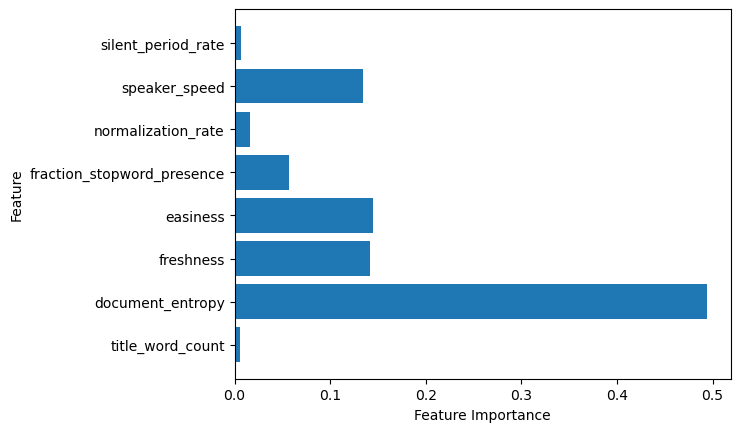

In [9]:
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(X_train.columns)), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

## We can conclude the following :
* **Highest impact** : Document Entropy is the most important feature; suggesting that a more targeted discussion, is highly valued and engaging.
* **Moderate impact** : a higher proportion of common words (stopwords) might simplify the text which would make it easier for viewers to follow along the video.
* **Lowest impact** : while the title's length might influence first clicks or viewer interest, it does not impact whether viewers stay engaged throughout the video.

### Limitations

* Some features might inadvertently introduce bias, skewing the model's predictions. For instance, if 'freshness' heavily influences predictions, newer content is always favored regardless of quality.
* Models like Gradient Boosting can be considered as a "black box," and it's difficult to understand exactly why a specific prediction is made because as the number of trees increases, tracing how input features led to a prediction becomes increasingly complex.

##### *To further enhance this analysis and address these limitations, I  welcome any feedback or insights you may have.*

### In Practice:
* **Content Strategy** : the model's insights can be used to help content creators in choosing optimal video features, such as ideal title length and necessary content focus, to enhance viewer engagement.
* **Recommendation Systems Improvement** : the  engagement predictions can be incorporated into a platform's recommendation algorithms to push more engaging content to users
* **Interactive suggestions** : For example,if we deploy this model into a dynamic system in the platform and if the uploaded video’s document entropy is too high ( the content is too scattered), the system could suggest narrowing the focus or dividing the content into more digestible modules. It's like providing instant feedback on how engaging the video is likely to be based on current content.

**Thank You for Reviewing This Project**

I appreciate you taking the time to go through my work. Please feel free to reach out if you have any questions, suggestions, or would like to discuss any aspects of this project further.

Best Regards,

Chaymae
##### *Chaymaejawhar@gmail.com*